In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data.csv")
df.head(5)

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


In [3]:
# Explore oveview data statistics
df.describe()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,45799.437958,2.982504,0.282870,0.002573,58.557108,0.078831,0.660218,7.439824,12.236460
std,22.689026,24211.275891,1.996825,0.450398,0.050660,6.316396,0.269476,0.473639,3.445069,6.717631
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.140000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,26624.000000,1.000000,0.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000
50%,28.000000,46522.500000,3.000000,0.000000,0.000000,58.340000,0.000000,1.000000,8.000000,12.000000
75%,43.000000,66612.000000,5.000000,1.000000,0.000000,62.280000,0.000000,1.000000,10.000000,18.000000
max,145.000000,86399.000000,6.000000,1.000000,1.000000,87.170000,1.000000,1.000000,12.000000,23.000000


In [4]:
#Explore dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   date                  62184 non-null  object 
 2   timestamp             62184 non-null  int64  
 3   day_of_week           62184 non-null  int64  
 4   is_weekend            62184 non-null  int64  
 5   is_holiday            62184 non-null  int64  
 6   temperature           62184 non-null  float64
 7   is_start_of_semester  62184 non-null  int64  
 8   is_during_semester    62184 non-null  int64  
 9   month                 62184 non-null  int64  
 10  hour                  62184 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 5.2+ MB


In [5]:
df.corr()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
number_people,1.000000,0.550218,-0.162062,-0.173958,-0.048249,0.373327,0.182683,0.335350,-0.097854,0.552049
timestamp,0.550218,1.000000,-0.001793,-0.000509,0.002851,0.184849,0.009551,0.044676,-0.023221,0.999077
day_of_week,-0.162062,-0.001793,1.000000,0.791338,-0.075862,0.011169,-0.011782,-0.004824,0.015559,-0.001914
is_weekend,-0.173958,-0.000509,0.791338,1.000000,-0.031899,0.020673,-0.016646,-0.036127,0.008462,-0.000517
is_holiday,-0.048249,0.002851,-0.075862,-0.031899,1.000000,-0.088527,-0.014858,-0.070798,-0.094942,0.002843
temperature,0.373327,0.184849,0.011169,0.020673,-0.088527,1.000000,0.093242,0.152476,0.063125,0.185121
is_start_of_semester,0.182683,0.009551,-0.011782,-0.016646,-0.014858,0.093242,1.000000,0.209862,-0.137160,0.010091
is_during_semester,0.335350,0.044676,-0.004824,-0.036127,-0.070798,0.152476,0.209862,1.000000,0.096556,0.045581
month,-0.097854,-0.023221,0.015559,0.008462,-0.094942,0.063125,-0.137160,0.096556,1.000000,-0.023624
hour,0.552049,0.999077,-0.001914,-0.000517,0.002843,0.185121,0.010091,0.045581,-0.023624,1.000000


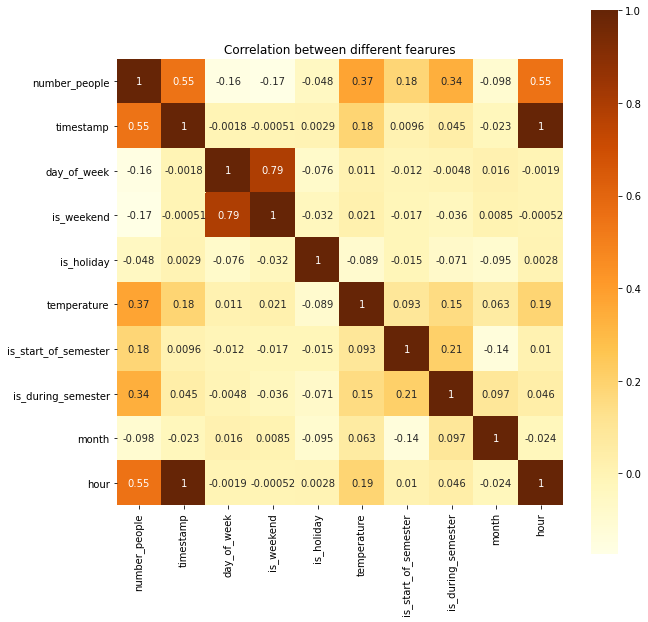

In [6]:
# Check Correlation between different fearures
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='YlOrBr')
plt.title('Correlation between different fearures')
# save the figure
plt.savefig('../static/image/plots/feature_corr.jpg', dpi=300, bbox_inches='tight')

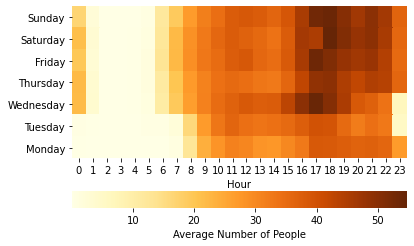

In [7]:
#Find Busiest hours and days of the week
#Convert time in secs to hours
df['Hour'] = df.timestamp.apply( lambda x: int(np.floor(x/3600))) 

g = df[['Hour','number_people','day_of_week']]

#Group by hour and weekday
F = g.groupby(['Hour','day_of_week'], as_index = False).number_people.mean().pivot('day_of_week','Hour', 'number_people').fillna(0)

# HMap grid params
grid_kws = {"height_ratios": (1.2, .2), "hspace": .8}

weekdays= 'Monday Tuesday Wednesday Thursday Friday Saturday Sunday'.split()
weekdays.reverse()

ax = sns.heatmap(F, cmap='YlOrBr',cbar_kws={"orientation": "horizontal"})
ax.set_yticklabels(weekdays, rotation = 0)
ax.set_ylabel('')
ax.set_xlabel('Hour')

cbar = ax.collections[0].colorbar
cbar.set_label('Average Number of People')
# save the figure
plt.savefig('../static/image/plots/busy_times.jpg', dpi=300, bbox_inches='tight')

In [8]:
# Drop date - not required since hour, day of week is given
df = df.drop("date", axis=1)
# one hot encode categorical columns
columns = ["day_of_week", "month", "hour"]
df = pd.get_dummies(df, columns=columns)
df.head(10)

,number_people,timestamp,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,Hour,day_of_week_0,day_of_week_1,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,37,61211,0,0,71.76,0,0,17,0,0,...,0,0,0,1,0,0,0,0,0,0
1,45,62414,0,0,71.76,0,0,17,0,0,...,0,0,0,1,0,0,0,0,0,0
2,40,63015,0,0,71.76,0,0,17,0,0,...,0,0,0,1,0,0,0,0,0,0
3,44,63616,0,0,71.76,0,0,17,0,0,...,0,0,0,1,0,0,0,0,0,0
4,45,64217,0,0,71.76,0,0,17,0,0,...,0,0,0,1,0,0,0,0,0,0
5,46,64818,0,0,72.15,0,0,18,0,0,...,0,0,0,0,1,0,0,0,0,0
6,43,66008,0,0,72.15,0,0,18,0,0,...,0,0,0,0,1,0,0,0,0,0
7,53,66609,0,0,72.15,0,0,18,0,0,...,0,0,0,0,1,0,0,0,0,0
8,54,67214,0,0,72.15,0,0,18,0,0,...,0,0,0,0,1,0,0,0,0,0
9,43,67815,0,0,72.15,0,0,18,0,0,...,0,0,0,0,1,0,0,0,0,0


In [9]:
# Remove Labels i.e. 'number_people' and retain all other columns or features
X = df.drop("number_people", axis=1)
X

,timestamp,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,Hour,day_of_week_0,day_of_week_1,day_of_week_2,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,61211,0,0,71.76,0,0,17,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,62414,0,0,71.76,0,0,17,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,63015,0,0,71.76,0,0,17,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,63616,0,0,71.76,0,0,17,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,64217,0,0,71.76,0,0,17,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62179,67348,1,0,61.07,0,1,18,0,0,0,...,0,0,0,0,1,0,0,0,0,0
62180,67955,1,0,61.07,0,1,18,0,0,0,...,0,0,0,0,1,0,0,0,0,0
62181,68560,1,0,56.71,0,1,19,0,0,0,...,0,0,0,0,0,1,0,0,0,0
62182,69167,1,0,56.71,0,1,19,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [10]:
# Get labels to be predicted
y = df["number_people"]
y

0        37
1        45
2        40
3        44
4        45
         ..
62179    23
62180    21
62181    25
62182    18
62183    23
Name: number_people, Length: 62184, dtype: int64

In [11]:
# Prepare test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train_features = X_train

In [12]:
# Scale the data to be between -1 and 1
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
#  Create model
model = RandomForestRegressor(n_jobs=-1)

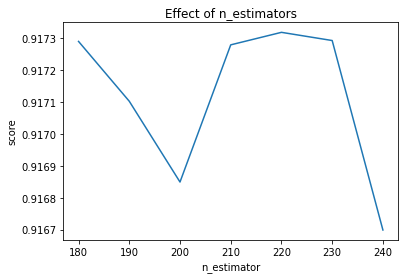

In [14]:
# Try different numbers of n_estimators over a range
estimators = np.arange(180, 250, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)
# save the figure
plt.savefig('../static/image/plots/rfr_n_estimators.jpg', dpi=300, bbox_inches='tight')

In [15]:
#List score - highes on top
scores.sort(reverse=True)
scores

[0.9173193378318013,
 0.9172936210163518,
 0.9172908291257691,
 0.917280060605512,
 0.9171030685100648,
 0.9168495410164113,
 0.916698927991701]

In [16]:
# Save scores with coresponding estimators
results = {}
i=0
for e in estimators:
    results[e] = scores[i]
    i += 1
results

{180: 0.9173193378318013,
 190: 0.9172936210163518,
 200: 0.9172908291257691,
 210: 0.917280060605512,
 220: 0.9171030685100648,
 230: 0.9168495410164113,
 240: 0.916698927991701}

In [17]:
new_model = RandomForestRegressor(n_estimators=230, n_jobs=-1)
new_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=230, n_jobs=-1)

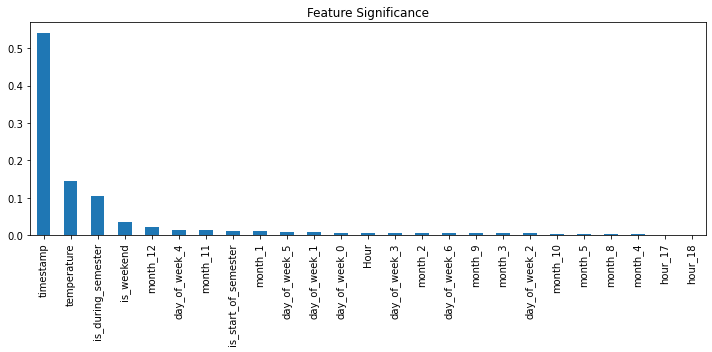

In [18]:
# Output feature importance coefficients, map them to their feature name, and sort values
coef = pd.Series(new_model.feature_importances_, index = X_train_features.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
coef.head(25).plot(kind='bar')
plt.title('Feature Significance')
plt.tight_layout()
# save the figure
plt.savefig('../static/image/plots/feature_importance.jpg', dpi=300, bbox_inches='tight')


In [19]:
# Predict Number of People
y_pred = new_model.predict(X_test)

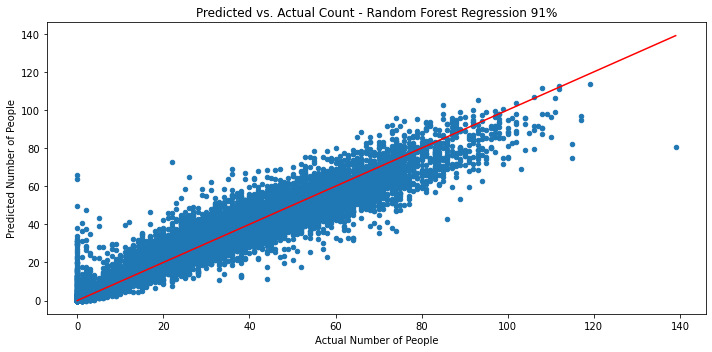

In [20]:
#Compare prediction vs actual
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, s=20)
plt.title('Predicted vs. Actual Count - Random Forest Regression 91%')
plt.xlabel('Actual Number of People')
plt.ylabel('Predicted Number of People')
# Ground Truth
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],  c='r',)
plt.tight_layout()
# save the figure
plt.savefig('../static/image/plots/rfr_model_accuracy.jpg', dpi=300, bbox_inches='tight')